# Stacking Learning

This tutorial demonstrates the Stacking technique with plots and cross-validation visualizations.

## What is Stacking?

**Stacking**, short for *stacked generalization*, is an ensemble method that combines multiple base models (level-0 models) and uses another model (meta-model or level-1 model) to learn how to best combine the predictions of the base models.

It aims to reduce generalization error by leveraging the strengths of each individual model.

## 🧩 How It Works

### **Step 1: Train Base Models (Level-0 models)**

These are diverse models trained on the original dataset.

### **Step 2: Generate Meta-Features**

Use the base models to make predictions. These predictions are used as features for the meta-model.

### **Step 3: Train the Meta-Model (Level-1 model)**

A model is trained on the predictions (meta-features) from the base models to make the final prediction.

## Why Use Stacking?

* Combines different learning algorithms to improve accuracy.
* Reduces the risk of overfitting compared to using a single model.
* Makes use of the diversity among base models.

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### 2. **Load Data**

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. **Define Base Models and Meta-Model**

base_learners = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC(probability=True))
]

meta_learner = LogisticRegression()

### 4. **Build and Train the Stacking Classifier**

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

stacking_clf.fit(X_train, y_train)

### 5. **Evaluate**

y_pred = stacking_clf.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))


## Tips for Effective Stacking

* Use **diverse** base learners to exploit their individual strengths.
* Cross-validation is crucial when generating meta-features to avoid data leakage.
* The meta-model should be simple (e.g., logistic regression) to avoid overfitting.

## Variants and Advanced Topics

| Variant                     | Description                                                                        |
| --------------------------- | ---------------------------------------------------------------------------------- |
| **Blending**                | Uses a holdout validation set to train the meta-model instead of cross-validation. |
| **Multi-layer stacking**    | Adds more layers of meta-models. Risky but potentially powerful.                   |
| **Heterogeneous ensembles** | Mix regression and classification models (with care).                              |

## When to Use Stacking

* When you have several good but different models.
* When you’re optimizing for the best possible accuracy on a predictive task.
* In competitions (e.g., Kaggle) where squeezing extra performance matters.

## Alternatives to Stacking

| Technique | Description                                                                                           |
| --------- | ----------------------------------------------------------------------------------------------------- |
| Bagging   | Combines multiple models of the same type, trained on bootstrapped samples. (e.g., Random Forest)     |
| Boosting  | Trains models sequentially, each correcting the errors of the previous one. (e.g., XGBoost, AdaBoost) |
| Voting    | Combines models by majority vote (classification) or averaging (regression).                          |

## Visual Summary

```plaintext
        Train Set
        ┌──────────────┐
        │              │
        ↓              ↓
  Model A          Model B
    ↓                ↓
Pred_A(X)        Pred_B(X)
        └─────┬──────┘
              ↓
     Meta-model (e.g. Logistic Regression)
              ↓
         Final Prediction
```

## Conclusion

Stacking is a robust ensemble method that often yields strong predictive performance by combining the strengths of multiple models. It’s especially effective when individual models capture different aspects of the data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
sns.set(style='whitegrid')

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC(probability=True))
]
meta_learner = LogisticRegression()
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

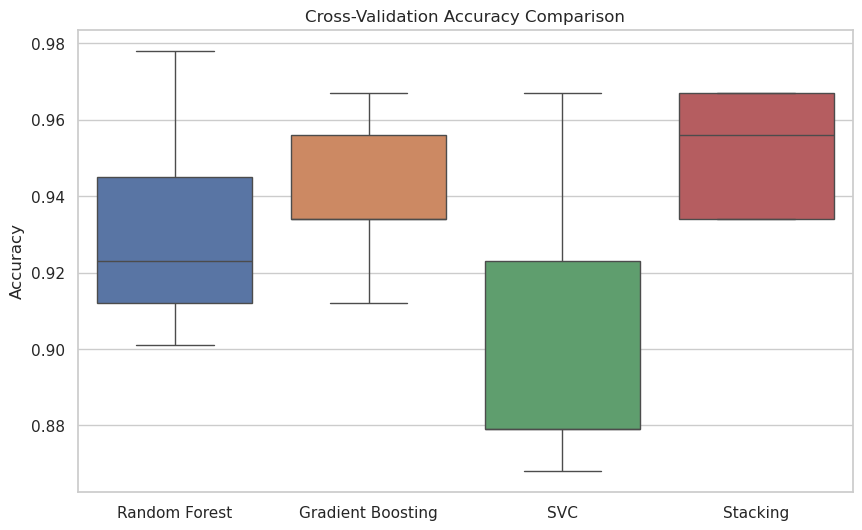

In [4]:
models = {
    'Random Forest': base_learners[0][1],
    'Gradient Boosting': base_learners[1][1],
    'SVC': base_learners[2][1],
    'Stacking': stacking_clf
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_results[name] = scores

# Plot cross-validation results
plt.figure(figsize=(10, 6))
sns.boxplot(data=list(cv_results.values()), orient='v')
plt.xticks(ticks=range(len(cv_results)), labels=cv_results.keys())
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Comparison')
plt.show()

Stacking Classifier Accuracy: 0.9561


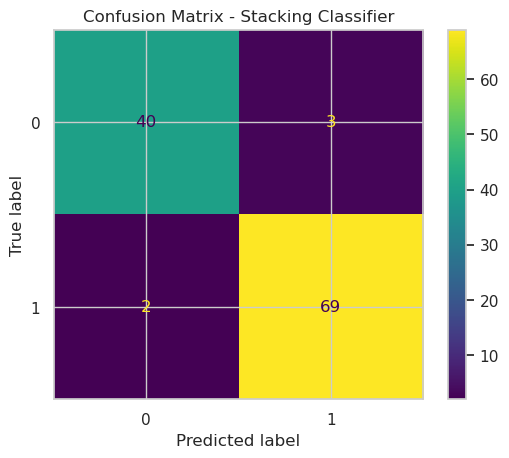

In [5]:
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(stacking_clf, X_test, y_test)
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()